In [3]:
#Used basic libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
#Reading the dataset
df = pd.read_csv("games.csv")

In [5]:
from sklearn.preprocessing import LabelEncoder     #Converting 'winner' column to categorical to predict winner
LE = LabelEncoder()
df['winner_cat'] = LE.fit_transform(df['winner'])
df.drop(["winner"], axis=1, inplace=True)
df.rename(columns = {"winner_cat":"winner"}, inplace = True)

## Data Analysis

In [6]:
df.head()     #The first 5 records of the dataset

,id,rated,created_at,last_move_at,turns,victory_status,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,winner
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,2
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,0
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,2
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,2
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,2


In [7]:
df.shape     #Number of records and number of attributes of the data set

(20058, 16)

In [8]:
df.dtypes     #Types of attributes found in the dataset

id                 object
rated                bool
created_at        float64
last_move_at      float64
turns               int64
victory_status     object
increment_code     object
white_id           object
white_rating        int64
black_id           object
black_rating        int64
moves              object
opening_eco        object
opening_name       object
opening_ply         int64
winner              int32
dtype: object

In [9]:
#Removing attributes that will not be used for classification from the dataset
df = df.drop(["id", "created_at", "last_move_at", "increment_code", "white_id", "white_rating", "black_id", "black_rating", "moves", "opening_eco", "opening_name", "opening_ply"], axis=1)

In [10]:
df.describe()     #Arithmetic mean of attributes, standard deviation, 5-number summaries

,turns,winner
count,20058.000000,20058.000000
mean,60.465999,1.044571
std,33.570585,0.975038
min,1.000000,0.000000
25%,37.000000,0.000000
50%,55.000000,1.000000
75%,79.000000,2.000000
max,349.000000,2.000000


In [11]:
df["rated"].describe()     #Boolean attribute properties

count     20058
unique        2
top        True
freq      16155
Name: rated, dtype: object

In [12]:
df.head()

,rated,turns,victory_status,winner
0,False,13,outoftime,2
1,True,16,resign,0
2,True,61,mate,2
3,True,61,mate,2
4,True,95,mate,2


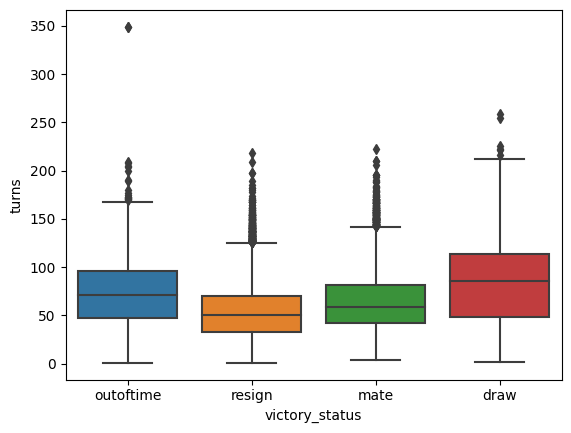

In [13]:
sns.boxplot(x='victory_status', y="turns", data=df);

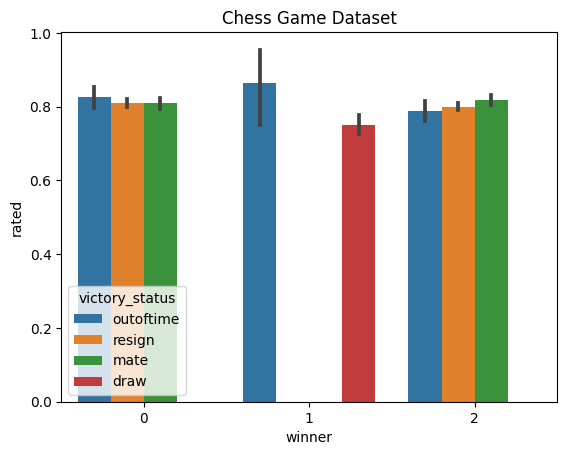

In [14]:
sns.barplot(x="winner", y="rated", hue="victory_status", data=df).set_title("Chess Game Dataset");

c:\users\chint\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


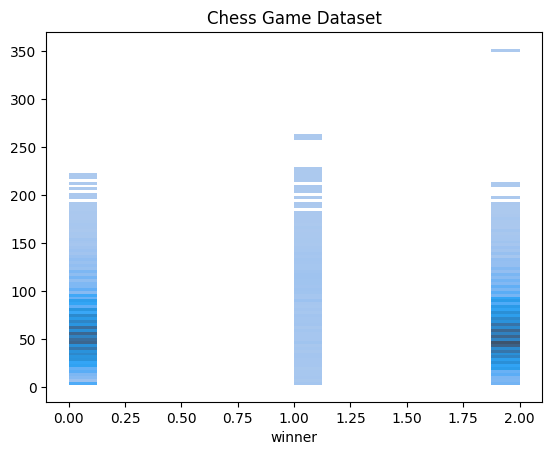

In [15]:
sns.histplot(x="winner", y=df.sum(axis=1), data=df).set_title("Chess Game Dataset");

## Data PreProcessing

In [16]:
df.isnull().sum()     #Missing data check

rated             0
turns             0
victory_status    0
winner            0
dtype: int64

In [17]:
df['rated'].value_counts()     #Finding the most frequently passed class for an attribute

True     16155
False     3903
Name: rated, dtype: int64

In [18]:
df['victory_status'].value_counts()     #Finding the most frequently passed class for an attribute

resign       11147
mate          6325
outoftime     1680
draw           906
Name: victory_status, dtype: int64

In [19]:
df['winner'].value_counts()     #Finding the most frequently passed class for an attribute

2    10001
0     9107
1      950
Name: winner, dtype: int64

In [20]:
df['victory_status'] = df['victory_status'].fillna("resign")     #Complementing missing data with a constant value

In [21]:
from sklearn.preprocessing import LabelEncoder     #Converting categorical data
LE = LabelEncoder()
df['victory_status_cat'] = LE.fit_transform(df['victory_status'])
df['rated_cat'] = LE.fit_transform(df['rated'])

In [22]:
df.drop(["victory_status","rated"], axis=1, inplace=True)

In [23]:
from sklearn.impute import KNNImputer     #Completing missing data with KNN Algorithm
imputer = KNNImputer(missing_values=np.nan, n_neighbors=5)
imputer.fit(df)
df[:] = imputer.transform(df)

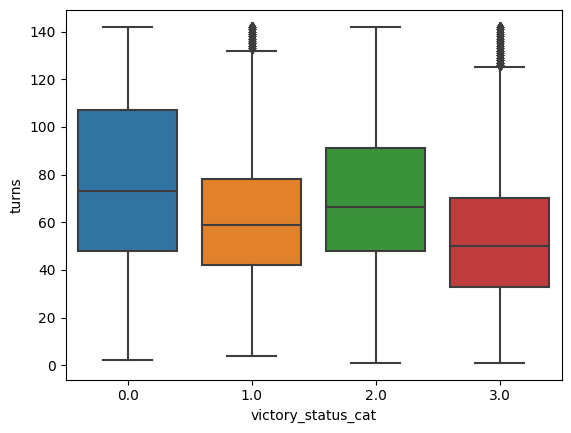

In [24]:
#Detecting outliers and filling with the mean value
df_turns = df["turns"]
Q1 = df_turns.quantile(0.25)
Q3 = df_turns.quantile(0.75)
IQR = Q3-Q1
alt_sinir = Q1 - 1.5*IQR
ust_sinir = Q3 + 1.5*IQR
tum_aykiriliklar = (df_turns < alt_sinir) | (df_turns > ust_sinir)

df_turns[tum_aykiriliklar] = df_turns.mean()
sns.boxplot(x='victory_status_cat', y="turns", data=df);

In [25]:
#Normalization of values in the 'turns' column
def normalize(val):
    val = (val-np.min(val))/(np.max(val)-np.min(val))
    return val
df["turns"] = normalize(df["turns"])
df.head()

,turns,winner,victory_status_cat,rated_cat
0,0.085106,2.0,2.0,0.0
1,0.106383,0.0,3.0,1.0
2,0.425532,2.0,1.0,1.0
3,0.425532,2.0,1.0,1.0
4,0.666667,2.0,1.0,1.0


In [26]:
df #Data set to apply Machine Learning Algorithm

,turns,winner,victory_status_cat,rated_cat
0,0.085106,2.0,2.0,0.0
1,0.106383,0.0,3.0,1.0
2,0.425532,2.0,1.0,1.0
3,0.425532,2.0,1.0,1.0
4,0.666667,2.0,1.0,1.0
...,...,...,...,...
20053,0.163121,2.0,3.0,1.0
20054,0.574468,0.0,1.0,1.0
20055,0.241135,2.0,1.0,1.0
20056,0.765957,2.0,3.0,1.0


## Preparing the training and test set

In [27]:
X = df.loc[:,("turns", "victory_status_cat", "rated_cat")]     #Dataset consisting only of features
y = df.loc[:,"winner"] # Sınıf etiketi
#Dividing the dataset as 70% train, 30% test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [28]:
## Carrying out the Training

In [29]:
#Training the model with the Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
#Classification of the model with test data
y_test_dt = dt_model.predict(X_test)
#Demonstrating the classification prediction success of the model
from sklearn.metrics import accuracy_score
acc_dt = accuracy_score(y_test, y_test_dt)
acc_dt

0.8911598537720172

In [31]:
#Training the model with the KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
#Classification of the model with test data
y_test_knn = knn_model.predict(X_test)

In [33]:
#Demonstrating the classification prediction success of the model
from sklearn.metrics import accuracy_score
acc_knn = accuracy_score(y_test, y_test_knn)
acc_knn

0.8622465935526753

In [34]:
#Training the model with Naive Bayes Algorithm
from sklearn.naive_bayes import CategoricalNB
nb_model = CategoricalNB()
nb_model.fit(X_train, y_train)

CategoricalNB()

In [35]:
#Classification of the model with test data
y_test_nb = nb_model.predict(X_test)
#Demonstrating the classification prediction success of the model
from sklearn.metrics import accuracy_score
acc_nb = accuracy_score(y_test, y_test_nb)
acc_nb

0.5461947490860751

## Saving and Reusing Classifier Models

In [36]:
#Decision Tree
import pickle
with open('dtmodel.pkl', 'wb') as f:
        pickle.dump(dt_model, f)
dt_model_2 = pickle.load(open('dtmodel.pkl', 'rb'))
y_test_dt_2 = dt_model_2.predict(X_test)
#Demonstrating the prediction accuracy of the Decision Tree model
acc_dt_2 = accuracy_score(y_test, y_test_dt_2)
acc_dt_2

0.8911598537720172

In [38]:
#KNN
import pickle
with open('knnmodel.pkl', 'wb') as f:
        pickle.dump(knn_model, f)

In [39]:
knn_model_2 = pickle.load(open('knnmodel.pkl', 'rb'))
y_test_knn_2 = knn_model_2.predict(X_test)

In [40]:
#Demonstrating the predictive accuracy of the KNN model
acc_knn_2 = accuracy_score(y_test, y_test_knn_2)
acc_knn_2

0.8622465935526753

In [41]:
#Naive Bayes
import pickle
with open('nbmodel.pkl', 'wb') as f:
        pickle.dump(nb_model, f)
nb_model_2 = pickle.load(open('nbmodel.pkl', 'rb'))
y_test_nb_2 = nb_model_2.predict(X_test)
#Demonstrating the predictive accuracy of the Naive Bayes model
acc_nb_2 = accuracy_score(y_test, y_test_nb_2)
acc_nb_2

0.5461947490860751

## Displaying Results on a Complexity Matrix

In [42]:
#Decision Tree
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_dt_2, labels=[0,1,2])

array([[2392,    0,  327],
       [   9,  260,    5],
       [ 311,    3, 2711]], dtype=int64)

In [43]:
#KNN
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_knn_2, labels=[0,1,2])

array([[2351,    0,  368],
       [   5,  260,    9],
       [ 445,    2, 2578]], dtype=int64)

In [44]:
#Naive Bayes
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_nb_2, labels=[0,1,2])

array([[   2,    0, 2717],
       [   0,  260,   14],
       [   0,    0, 3025]], dtype=int64)